# Topic-Sensitive PageRank: Implementation & Comparison

This notebook demonstrates how to implement **Topic-Sensitive PageRank (TSPR)** using biased random walks based on predefined topics such as **sports** and **politics**.

We will:
- Construct a synthetic web graph
- Annotate each node with a topic
- Compute both traditional and topic-sensitive PageRank
- Compare the results numerically and visually


### Setup: Install Required Libraries

Make sure you have NetworkX and Matplotlib installed:

`pip install networkx matplotlib`

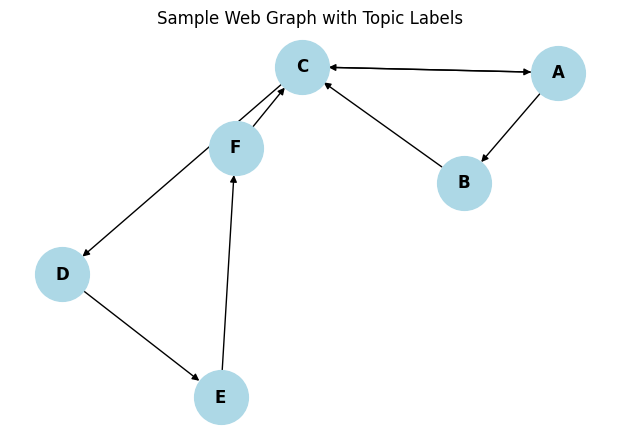

PageRank Comparison (Traditional vs Topic-Sensitive):
   Standard PageRank  TSPR (Sports)  TSPR (Politics)
A             0.1516         0.2038           0.1271
B             0.0894         0.1616           0.0540
C             0.2978         0.3031           0.2990
D             0.1516         0.1288           0.2021
E             0.1538         0.1095           0.1718
F             0.1558         0.0931           0.1460


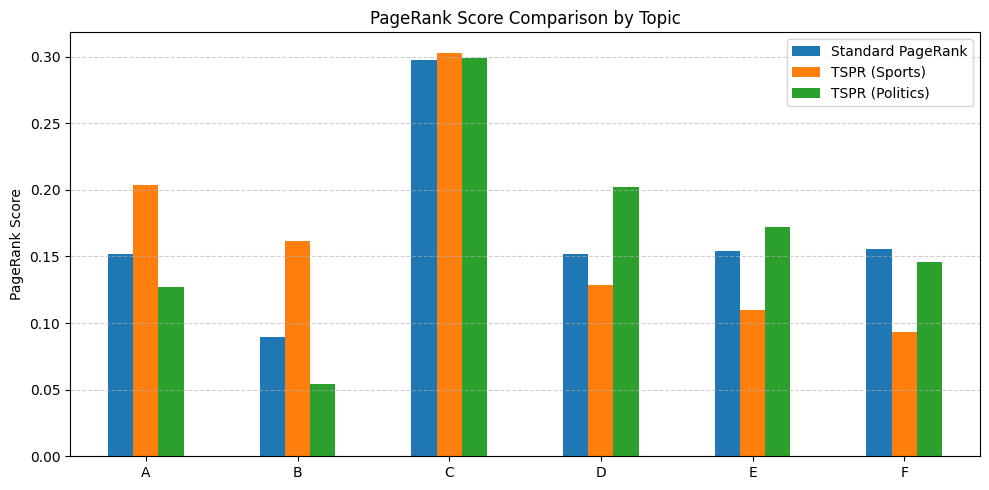

In [ ]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd


# STEP 1: Create a web graph

# Define a directed graph (web structure)
G = nx.DiGraph()

# Add edges between pages (nodes) to simulate hyperlinks
edges = [
    ("A", "B"), ("A", "C"),
    ("B", "C"), ("C", "A"),
    ("C", "D"), ("D", "E"),
    ("E", "F"), ("F", "C")
]
G.add_edges_from(edges)


# STEP 2: Assign topics to each node

# Each node is tagged with a content category (topic)
topic_labels = {
    "A": "sports",
    "B": "sports",
    "C": "politics",
    "D": "politics",
    "E": "technology",
    "F": "technology"
}


# STEP 3: Visualize the graph

# Draw the graph to visualize link structure and node positions
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)  # spring layout for aesthetics
nx.draw(
    G, pos,
    with_labels=True,
    node_color="lightblue",
    node_size=1500,
    font_weight="bold"
)
plt.title("Sample Web Graph with Topic Labels")
plt.show()


# STEP 4: Define Topic-Sensitive PageRank Function

def topic_sensitive_pagerank(G, topic, alpha=0.85):
    """
    Computes PageRank with a teleportation vector biased toward nodes with a specific topic.

    Parameters:
    - G: networkx graph
    - topic: topic string to bias towards (e.g., 'sports', 'politics')
    - alpha: damping factor (default is 0.85)

    Returns:
    - Dictionary of node PageRank scores
    """
    # Create a personalization vector:
    # Nodes matching the target topic get 1, others get 0
    personalization = {
        node: 1.0 if topic_labels[node] == topic else 0.0
        for node in G.nodes()
    }

    # Normalize the vector to sum to 1
    total = sum(personalization.values())
    if total == 0:
        raise ValueError(f"No nodes found for topic: {topic}")
    personalization = {k: v / total for k, v in personalization.items()}

    # Run topic-sensitive PageRank using the biased teleportation vector
    return nx.pagerank(G, alpha=alpha, personalization=personalization)


# STEP 5: Run Traditional PageRank

# Computes standard PageRank using uniform teleportation (no personalization)
pr_standard = nx.pagerank(G, alpha=0.85)


# STEP 6: Run Topic-Sensitive PageRank for Sports and Politics

# Compute rankings for each topic
pr_sports = topic_sensitive_pagerank(G, topic="sports")
pr_politics = topic_sensitive_pagerank(G, topic="politics")


# STEP 7: Display and Compare Results

# Combine results into a DataFrame for clear comparison
df = pd.DataFrame({
    "Standard PageRank": pr_standard,
    "TSPR (Sports)": pr_sports,
    "TSPR (Politics)": pr_politics
}).round(4)

# Display the DataFrame
print("PageRank Comparison (Traditional vs Topic-Sensitive):")
print(df)


# STEP 8: Visualize Score Comparison

# Plot bar chart to compare scores under different ranking strategies
df.plot(
    kind="bar",
    figsize=(10, 5),
    title="PageRank Score Comparison by Topic"
)
plt.ylabel("PageRank Score")
plt.xticks(rotation=0)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## What the Output Shows: Topic-Sensitive PageRank

## Web Graph Construction

We begin by creating a small directed graph representing a miniature web. Each node is annotated with a topic (e.g., 'sports', 'politics', 'technology'). This allows us to simulate a personalized teleportation strategy in TSPR.


## Comparing Results

We compare the PageRank scores of each node under:
- Traditional (uniform) PageRank
- Topic-Sensitive PageRank for Sports
- Topic-Sensitive PageRank for Politics

This helps us understand how topic bias affects ranking.

<br>

### What Each Column Represents

- **Standard**:  
  The original PageRank score, based solely on hyperlink structure. No personalization is applied.

- **Sports (TSPR)**:  
  Computed with a teleportation vector biased toward nodes labeled `"sports"` (nodes A and B). These nodes get higher importance scores.

- **Politics (TSPR)**:  
  Computed with a teleportation vector biased toward nodes labeled `"politics"` (nodes C and D). These become the most important in this context.

<br>

###  Observations

1. **Topic Influence**:
   - In *Sports (TSPR)*, nodes A and B rise in rank.
   - In *Politics (TSPR)*, nodes C and D dominate.
   - Rankings shift based on topic bias.

2. **Context Sensitivity**:
   - Standard PageRank gives a universal ranking.
   - TSPR adjusts rankings dynamically for different interests.

3. **Personalization**:
   - Mimics how a personalized search engine might rank results based on user preferences.

<br>

### Visualization Insights

A bar chart helps visualize how each node’s importance changes under different ranking models:

- Node A is most relevant in Sports, least in Politics.
- Node C dominates in Politics but not in Sports.
- Node F remains fairly stable across rankings, reflecting neutral topic association.

<br>

### Use Cases/Applications

- **Topic-Sensitive PageRank (TSPR)** enables:
  - Personalized search experiences.
  - Re-ranking of content based on semantic interests.
  - Improved relevance and user satisfaction.

- It is suitable for:
  - Search engines
  - Recommender systems
  - Social media content feeds
  - Academic and e-learning platforms

<br>
